# Temperatura del procesador

Tenemos un sensor de temperatura en el procesador el servidor de nuestra empresa. Queremos analizar los datos proporcionados para analizar si debemos cambiar de sistema de refrigeración por uno mejor. Es caro y como analista de datos no podemos tomar decisiones sin base.

Proporcionamos las temperaturas medidas a lo largo de las 24 horas de un día en una estructura de datos tipo lista compuesta de 24 números enteros:

In [1]:
temperaturas_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]

## Gráfica de temperaturas
Para facilitar el entendimiento se te muestra a continuación la gráfica de temperatura. No tienes que hacer nada en este apartado. La prueba empieza en **Problema**. 

Text(0.5, 1.0, 'Temperaturas de nuestro servidor a lo largo del día')

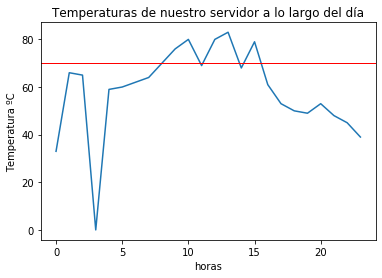

In [3]:
# imports
import matplotlib.pyplot as plt
%matplotlib inline

# eje x, eje y
y = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# imprimir figura
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('horas')
plt.ylabel('Temperatura ºC')
plt.title('Temperaturas de nuestro servidor a lo largo del día')

## Problema

Si el sensor detecta más de 4 horas con temperaturas mayores o igual que 70ºC o alguna temperatura superior a 80ºC o la media fuera superior a 65ºC a lo largo de todo el día, deberemos dar la orden de cambiar el sistema de refrigeración para evitar dañar el procesador. 

Te vamos a guiar paso a paso para que puedas tomar la decisión calculando algunos pasos intermedios: 

1. Temperatura mínima
2. Temperatura máxima
3. Temperaturas igual o superior a 70ºC
4. Media de temperaturas a lo largo del día. 
5. Si hubiera un fallo en el sensor a las 03:00 y no capturáramos el dato, ¿Cómo estímarias el valor que nos falta? Corrige ese valor en la lista de temperaturas. 
6. Bonus: Nuestro personal de mantenimiento es de Estados Unidos y no entiende el sistema métrico internacional. Pása las temperaturas a Grados Fahrenheit.

Fórmula: F = 1.8 * C + 32

In [24]:
# asigna a una variable la lista de temperaturas
temperaturas_C = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]

# 1. Calcula el mínimo de la lista e imprime el valor con print()

temperatura_minima = min(temperaturas_C)

print ('La temperatura mínima es: ' + str(temperatura_minima))

# 2. Calcula el máximo de la lista e imprime el valor con print()

temperatura_maxima = max(temperaturas_C)

print ('La temperatura máxima es: ' + str(temperatura_maxima))

# 3. Elementos de la lista que son mayores que 70ºC e imprime el resultado

mayores_70 = []

for temperatura in temperaturas_C:
    if temperatura > 70:
        mayores_70.append(temperatura)

print('Los elementos de la lista que son mayores de 70ºC son: '+ str(mayores_70))

# 4. cálculo de la media de temperaturas a lo largo del día e imprime resultado

def media(datos):
    sumatorio = sum(datos)
    longitud = int(len(datos))
    resultado = sumatorio / longitud
    return resultado

print('La media de temperaturas a lo largo del día es: ', media(temperaturas_C),'ºC')

# 5.1 Soluciona el fallo en el sensor estimando un valor

# Se estima un valor interpolando entre los que tiene por delante y por detrás en la lista

indice_0 = temperaturas_C.index(0)
dato_predecesor = temperaturas_C [indice_0-1]
dato_sucesor = temperaturas_C [indice_0+1]
valor_estimado = int((dato_predecesor + dato_sucesor)/2)

print('El valor estimado para el fallo del sensor es: ', valor_estimado, 'ºC')

# 5.2 Actualización del valor estimado a las 03:00 en la lista

temperaturas_C_act = []

for temperatura in temperaturas_C:
    if temperatura != 0:
        temperaturas_C_act.append(temperatura)
    else:
        temperaturas_C_act.append(valor_estimado)

print('La lista actualizada de temperaturas con el nuevo valor estimado es: ', temperaturas_C_act)

# Bonus: pasar la lista de ºC a grados Farenheit

def fahrenheit(C):
    F = 1.8 * C + 32
    return round(F,1)

temperaturas_F = []

for temperatura in temperaturas_C:
    temperaturas_F.append(fahrenheit(temperatura))

print('La lista de temperaturas en grados Farhenheit es: ', temperaturas_F)

La temperatura mínima es: 0
La temperatura máxima es: 90
Los elementos de la lista que son mayores de 70ºC son: [76, 80, 81, 80, 83, 90, 79]
La media de temperaturas a lo largo del día es:  60.25 ºC
El valor estimado para el fallo del sensor es:  62 ºC
La lista actualizada de temperaturas con el nuevo valor estimado es:  [33, 66, 65, 62, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]
La lista de temperaturas en grados Farhenheit es:  [91.4, 150.8, 149.0, 32.0, 138.2, 140.0, 143.6, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.2, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


## Toma la decisión
Recuerda que si el sensor detecta más de 4 horas con temperaturas mayores o igual que 70ºC o alguna temperatura superior a 80ºC o la media fuera superior a 65ºC a lo largo de todo el día, deberemos dar la orden de cambiar el sistema de refrigeración para evitar el peligro de dañar el equipamiento: 
* más de 4 horas con temperaturas mayores o igual que 70ºC
* alguna temperatura superior a 80ºC
* media fuera superior a 65ºC a lo largo de todo el día
Si se cumple alguna de estas tres habrá que cambiar el sistema de refrigeración. 

In [25]:
# Imprime True o False en función de si cambiarías el sistema de refrigeración o no

# Comprobamos si alguna temperatura es superior a 80ºC

for temperatura in temperaturas_C:
    if temperatura > 80:
        temp_sup_80 = True


# Comprobamos si se cumpe alguna de las condiciones para cambiar el sistema de refrigeración

if len(mayores_70) > 4 or temp_sup_80 == True or media(temperaturas_C) > 65:
    cambiar_sistema = True
    print(cambiar_sistema)

True
